In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean.csv')


<ipython-input-2-5fe38719cdd1>:1: DtypeWarning: Columns (29,30,31,32,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type                        15235 non-null  object 
 1   created                     15235 non-null  object 
 2   updated                     15235 non-null  object 
 3   drugbank-id                 16166 non-null  object 
 4   name                        16166 non-null  object 
 5   description                 12929 non-null  object 
 6   cas-number                  9553 non-null   object 
 7   unii                        10934 non-null  object 
 8   state                       9171 non-null   object 
 9   groups                      15235 non-null  object 
 10  synthesis-reference         1604 non-null   object 
 11  indication                  4174 non-null   object 
 12  pharmacodynamics            3042 non-null   object 
 13  mechanism-of-action         391

In [4]:
columns_to_drop = [
    'drugbank-id','type', 'created', 'updated', 'description', 'cas-number', 'unii', 'food-interactions',
    'synthesis-reference', 'indication', 'pharmacodynamics', 'mechanism-of-action',
    'toxicity', 'metabolism', 'absorption', 'half-life', 'protein-binding',
    'route-of-elimination', 'volume-of-distribution', 'clearance', 'ahfs-codes',
    'sequences', 'pathways', 'reactions', 'snp-effects', 'snp-adverse-drug-reactions',
    'carriers', 'transporters', 'fda-label', 'msds', 'atc-codes',	'pdb-entries'
]

# Assuming 'drugbank-id', 'name', 'groups', 'pdb-entries', 'drug-interactions', 'targets', 'average-mass', 'monoisotopic-mass' are kept for your analysis.

# Drop columns from your dataset
data = data.drop(columns=columns_to_drop)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16762 entries, 0 to 16761
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16166 non-null  object 
 1   state              9171 non-null   object 
 2   groups             15235 non-null  object 
 3   drug-interactions  4478 non-null   object 
 4   enzymes            2301 non-null   object 
 5   targets            7867 non-null   object 
 6   average-mass       11586 non-null  float64
 7   monoisotopic-mass  11586 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [6]:
data.head(10)

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
0,Lepirudin,solid,approved withdrawn,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,BE0000048,NaN,NaN
3,Cetuximab,liquid,approved,DB05209 DB14905 DB06474 DB09381 DB06647 DB1195...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,BE0002096 BE0000767 BE0000710 BE0002097 BE0002...,NaN,NaN
5,Dornase alfa,liquid,approved,NaN,NaN,BE0004796,NaN,NaN
6,Denileukin diftitox,liquid,approved investigational,DB06770 DB12532 DB00281 DB09107 DB08987 DB0029...,NaN,BE0000651 BE0000658 BE0002102,NaN,NaN
7,Etanercept,liquid,approved investigational,DB08880 DB00328 DB00682 DB00928 DB15274 DB1464...,NaN,BE0009995 BE0000901 BE0000710 BE0001087 BE0002...,NaN,NaN
8,Bivalirudin,solid,approved investigational,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,NaN,2180.2853,2178.985813
9,NaN,NaN,NaN,NaN,BE0001075,BE0000048,NaN,NaN


In [7]:
data.describe()

,average-mass,monoisotopic-mass
count,11586.000000,11586.000000
mean,382.720268,382.350030
std,265.475892,265.261013
min,2.016000,2.015650
25%,247.352750,247.162565
50%,344.437800,344.161700
75%,445.176000,444.258143
max,6116.740000,6096.882449


In [8]:
data['targets'] = data['targets'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [9]:
data.head(10)

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
0,Lepirudin,solid,approved withdrawn,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
3,Cetuximab,liquid,approved,DB05209 DB14905 DB06474 DB09381 DB06647 DB1195...,NaN,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
5,Dornase alfa,liquid,approved,NaN,NaN,1,NaN,NaN
6,Denileukin diftitox,liquid,approved investigational,DB06770 DB12532 DB00281 DB09107 DB08987 DB0029...,NaN,1,NaN,NaN
7,Etanercept,liquid,approved investigational,DB08880 DB00328 DB00682 DB00928 DB15274 DB1464...,NaN,1,NaN,NaN
8,Bivalirudin,solid,approved investigational,DB13821 DB00328 DB08953 DB00682 DB00928 DB0912...,NaN,0,2180.2853,2178.985813
9,NaN,NaN,NaN,NaN,BE0001075,1,NaN,NaN


In [10]:
data.dropna(subset=['name'], inplace=True)

In [11]:
data.dropna(subset=['drug-interactions'], inplace=True)

In [12]:
data.dropna(subset=['state'], inplace=True)

In [13]:
data.dropna(subset=['enzymes'], inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   object 
 1   state              1240 non-null   object 
 2   groups             1240 non-null   object 
 3   drug-interactions  1240 non-null   object 
 4   enzymes            1240 non-null   object 
 5   targets            1240 non-null   int64  
 6   average-mass       1149 non-null   float64
 7   monoisotopic-mass  1149 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 87.2+ KB


In [15]:
# prompt: do label encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_cols = ['name','state','groups','drug-interactions','enzymes']  # Replace with actual categorical column names
for col in categorical_cols:
  data[col] = label_encoder.fit_transform(data[col])

# Display the modified DataFrame
data.head()


,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,840,0,1,706,185,1,NaN,NaN
15,566,0,1,701,185,1,NaN,NaN
24,567,0,1,699,185,1,NaN,NaN
25,839,0,0,0,33,1,NaN,NaN
27,841,0,0,697,148,1,NaN,NaN


In [16]:
data.isnull()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,False,False,False,False,False,False,True,True
15,False,False,False,False,False,False,True,True
24,False,False,False,False,False,False,True,True
25,False,False,False,False,False,False,True,True
27,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
16028,False,False,False,False,False,False,False,False
16069,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False
16109,False,False,False,False,False,False,True,True


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   int64  
 1   state              1240 non-null   int64  
 2   groups             1240 non-null   int64  
 3   drug-interactions  1240 non-null   int64  
 4   enzymes            1240 non-null   int64  
 5   targets            1240 non-null   int64  
 6   average-mass       1149 non-null   float64
 7   monoisotopic-mass  1149 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 87.2 KB


In [18]:
average_mass_median = data['average-mass'].median()
monoisotopic_mass_median = data['monoisotopic-mass'].median()
print("Average Mass Median:", average_mass_median)
print("Monoisotopic Mass Median:", monoisotopic_mass_median)
# Fill null values with median
data['average-mass'].fillna(average_mass_median, inplace=True)
data['monoisotopic-mass'].fillna(monoisotopic_mass_median, inplace=True)


Average Mass Median: 370.422
Monoisotopic Mass Median: 370.098727764


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 11 to 16458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1240 non-null   int64  
 1   state              1240 non-null   int64  
 2   groups             1240 non-null   int64  
 3   drug-interactions  1240 non-null   int64  
 4   enzymes            1240 non-null   int64  
 5   targets            1240 non-null   int64  
 6   average-mass       1240 non-null   float64
 7   monoisotopic-mass  1240 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 87.2 KB


In [20]:
data.isnull()

,name,state,groups,drug-interactions,enzymes,targets,average-mass,monoisotopic-mass
11,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
16028,False,False,False,False,False,False,False,False
16069,False,False,False,False,False,False,False,False
16080,False,False,False,False,False,False,False,False
16109,False,False,False,False,False,False,False,False


In [26]:
# prompt: perform IQR to remove outliers and generate a csv file

# Calculate IQR for relevant numerical columns
Q1 = data[['average-mass', 'monoisotopic-mass']].quantile(0.25)
Q3 = data[['average-mass', 'monoisotopic-mass']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data_filtered = data[~((data[['average-mass', 'monoisotopic-mass']] < lower_bound) | (data[['average-mass', 'monoisotopic-mass']] > upper_bound)).any(axis=1)]

# Save filtered data to a CSV file
data_filtered.to_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean_no_outliers_IQR.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9012875536480687

Confusion Matrix:
 [[  0  23]
 [  0 210]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.90      1.00      0.95       210

    accuracy                           0.90       233
   macro avg       0.45      0.50      0.47       233
weighted avg       0.81      0.90      0.85       233

Cross-validation scores: [1.         1.         0.98290598 1.         0.89655172 0.9137931
 0.78448276 0.85344828 0.87068966 0.86206897]
Average cross-validation score: 0.9163940465664604


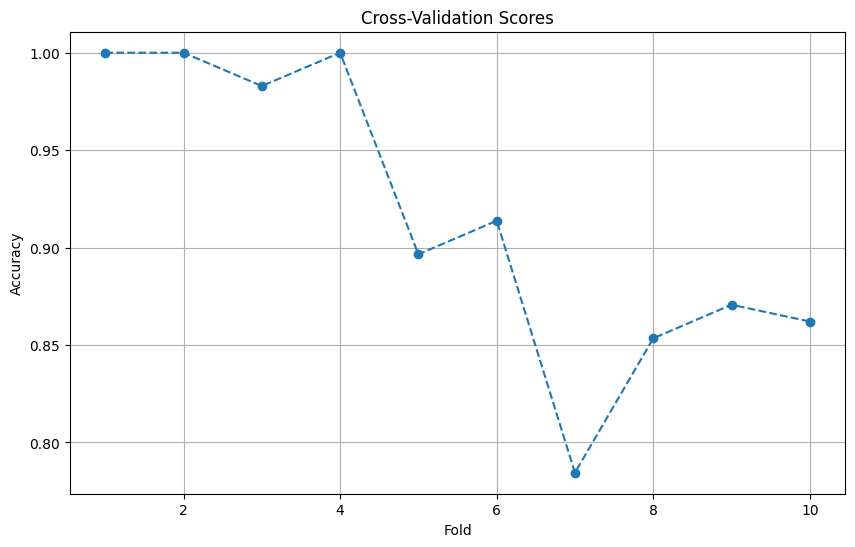

In [44]:
# prompt: perfoem logistic regression on this filetered data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Load the filtered data
data_filtered = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/drugbank_clean_no_outliers_IQR.csv')

# Assuming 'targets' is your target variable and the rest are features
X = data_filtered.drop('targets', axis=1)
y = data_filtered['targets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Initialize KFold with 10 splits
kf = KFold(n_splits=10)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.940677966101695

Confusion Matrix:
 [[  0  14]
 [  0 222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.94      1.00      0.97       222

    accuracy                           0.94       236
   macro avg       0.47      0.50      0.48       236
weighted avg       0.88      0.94      0.91       236

Cross-validation scores: [1.         1.         0.99152542 1.         0.92372881 0.93220339
 0.83898305 0.87288136 0.92307692 0.8974359 ]
Average cross-validation score: 0.9379834854411125


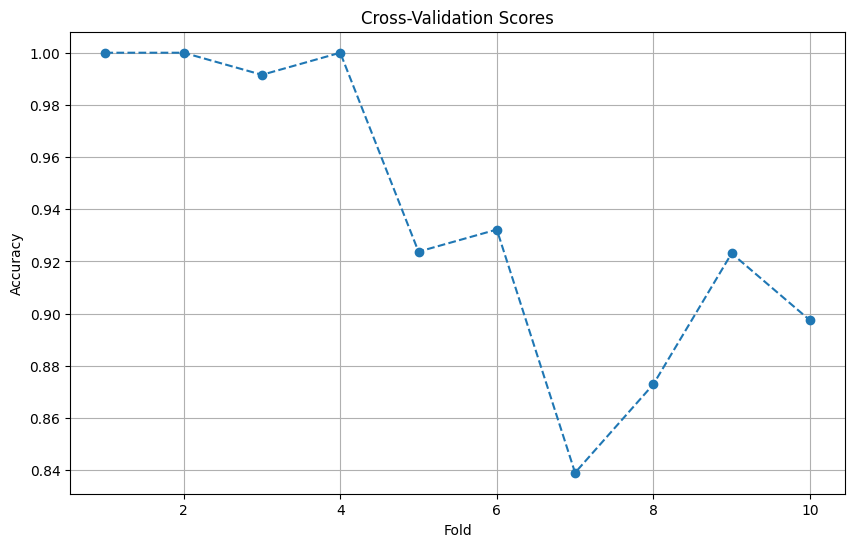

In [45]:
# prompt: perfoem logistic regression on this filetered data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Load the filtered data
data_filtered = pd.read_csv('/content/drive/MyDrive/Machine learning Lab/cleaned_drug_data_z2.csv')

# Assuming 'targets' is your target variable and the rest are features
X = data_filtered.drop('targets', axis=1)
y = data_filtered['targets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Initialize KFold with 10 splits
kf = KFold(n_splits=10)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.grid(True)
plt.show()

